Checking for GPU

In [8]:
# i will be using tensorflow framework
import tensorflow as tf
# List all GPUs available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU(s) detected:")
    for gpu in gpus:
        print(f"Name: {gpu.name}")
        print(f"Details: {tf.config.experimental.get_device_details(gpu)}")
else:
    print("No GPU detected.")

GPU(s) detected:
Name: /physical_device:GPU:0
Details: {'device_name': 'NVIDIA GeForce RTX 4060 Laptop GPU', 'compute_capability': (8, 9)}


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
import PIL
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [23]:
# Reading XML files and returning image name and bounding-box coordinates
def return_name_bbox(xml_file):
    tree = ET.parse(xml_file)
    root  = tree.getroot()

    image_name = root.find("filename").text
    bbox = {
        "xmin" : int(root.find('object/bndbox/xmin').text),
        "ymin" : int(root.find('object/bndbox/ymin').text),
        "xmax" : int(root.find('object/bndbox/xmax').text),
        "ymax" : int(root.find('object/bndbox/ymax').text)
    }
    return image_name,bbox

In [24]:
xml_file_path = os.listdir("D:/Dataset/Car_Plate_segmentation/annotations")
xml_file_path = [f"D:/Dataset/Car_Plate_segmentation/annotations/{xml}" for xml in xml_file_path ]

# image_file_path = os.listdir("D:/Development/Dataset/Car_Plate_segmentation/images")
# image_file_path = [f"D:/Development/Dataset/Car_Plate_segmentation/images/{img}" for img in image_file_path]
data = []
for xml_file in xml_file_path:
    name , bbox = return_name_bbox(xml_file)
    data.append([f"D:/Dataset/Car_Plate_segmentation/images/{name}", bbox])

df = pd.DataFrame(data, columns=['ImagePath', 'BBox'])

df.head()

,ImagePath,BBox
0,D:/Dataset/Car_Plate_segmentation/images/Cars0...,"{'xmin': 226, 'ymin': 125, 'xmax': 419, 'ymax'..."
1,D:/Dataset/Car_Plate_segmentation/images/Cars1...,"{'xmin': 134, 'ymin': 128, 'xmax': 262, 'ymax'..."
2,D:/Dataset/Car_Plate_segmentation/images/Cars1...,"{'xmin': 140, 'ymin': 5, 'xmax': 303, 'ymax': ..."
3,D:/Dataset/Car_Plate_segmentation/images/Cars1...,"{'xmin': 175, 'ymin': 114, 'xmax': 214, 'ymax'..."
4,D:/Dataset/Car_Plate_segmentation/images/Cars1...,"{'xmin': 167, 'ymin': 202, 'xmax': 240, 'ymax'..."


In [25]:
train, test = train_test_split(df, test_size=0.1, random_state=1)

In [26]:
def normalize_bbox(bbox, image_shape):
    width, height = image_shape[1], image_shape[0]
    return [
        bbox['xmin'] / width,
        bbox['ymin'] / height,
        bbox['xmax'] / width,
        bbox['ymax'] / height
    ]

In [27]:
train_images = []
train_labels = []


for name , row in train.iterrows():
    img = load_img(row['ImagePath'])
    img_array = img_to_array(img) / 255.0  
    
    # Normalize images for 512x512 image
    bbox = row['BBox']
    normalized_bbox = normalize_bbox(bbox, img_array.shape)
    print(normalized_bbox) 


    img = img.resize((512, 512))  # Resize images to a fixed size
    img_array = img_to_array(img) / 255.0  # Normalize images
    train_images.append(img_array)

    label =normalized_bbox  # Assuming "fracture found" is always 1 for this example
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

[0.3725, 0.5542168674698795, 0.6525, 0.6355421686746988]
[0.5, 0.49666666666666665, 0.6275, 0.5566666666666666]
[0.3775, 0.6133333333333333, 0.6375, 0.7066666666666667]
[0.18666666666666668, 0.398, 0.6933333333333334, 0.542]
[0.39097744360902253, 0.405, 0.5538847117794486, 0.4975]
[0.235, 0.24888888888888888, 0.765, 0.7511111111111111]
[0.0725, 0.64, 0.1425, 0.6766666666666666]
[0.825, 0.5692883895131086, 0.915, 0.6704119850187266]
[0.23, 0.700374531835206, 0.3425, 0.7752808988764045]
[0.285, 0.395, 0.5725, 0.505]
[0.3, 0.700374531835206, 0.8125, 0.8239700374531835]
[0.6025, 0.6046511627906976, 0.72, 0.6810631229235881]
[0.39, 0.36666666666666664, 0.6075, 0.53]
[0.418, 0.45, 0.566, 0.5633333333333334]
[0.13, 0.6640625, 0.1825, 0.7109375]
[0.10571428571428572, 0.5513307984790875, 0.9114285714285715, 0.7718631178707225]
[0.81, 0.54, 0.9375, 0.5833333333333334]
[0.37, 0.6866666666666666, 0.705, 0.7933333333333333]
[0.05, 0.29, 0.9, 0.5166666666666667]
[0.13733075435203096, 0.6765676567656

In [28]:
test_images = []
test_labels = []

for name , row in test.iterrows():
    img = load_img(row['ImagePath'])
    img_array = img_to_array(img) / 255.0  
    
    # Normalize images for 512x512 image
    bbox = row['BBox']
    normalized_bbox = normalize_bbox(bbox, img_array.shape)
    print(normalized_bbox) 


    img = img.resize((512, 512))  # Resize images to a fixed size
    img_array = img_to_array(img) / 255.0  # Normalize images
    test_images.append(img_array)

    label =normalized_bbox  # Assuming "fracture found" is always 1 for this example
    test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

[0.43523316062176165, 0.49, 0.6217616580310881, 0.5775]
[0.36, 0.38, 0.75, 0.48333333333333334]
[0.355, 0.458955223880597, 0.58, 0.6305970149253731]
[0.188135593220339, 0.18857142857142858, 0.8779661016949153, 0.7028571428571428]
[0.402, 0.5093333333333333, 0.576, 0.6133333333333333]
[0.685, 0.7259887005649718, 0.875, 0.8389830508474576]
[0.2325, 0.7682926829268293, 0.5025, 0.8983739837398373]
[0.1225, 0.6104868913857678, 0.28, 0.7228464419475655]
[0.375, 0.7033333333333334, 0.6175, 0.79]
[0.4175, 0.6733333333333333, 0.6, 0.7333333333333333]
[0.8022222222222222, 0.6185185185185185, 0.9644444444444444, 0.6777777777777778]
[0.565, 0.6033333333333334, 0.8175, 0.7]
[0.415, 0.5522388059701493, 0.5825, 0.6865671641791045]
[0.5333333333333333, 0.5284280936454849, 0.8422222222222222, 0.725752508361204]
[0.415, 0.4768392370572207, 0.5875, 0.5640326975476839]
[0.4112627986348123, 0.6253776435045317, 0.5102389078498294, 0.7009063444108762]
[0.6505747126436782, 0.8241379310344827, 0.97471264367816

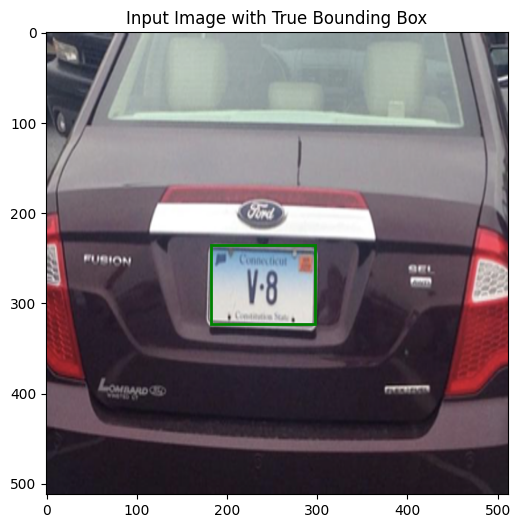

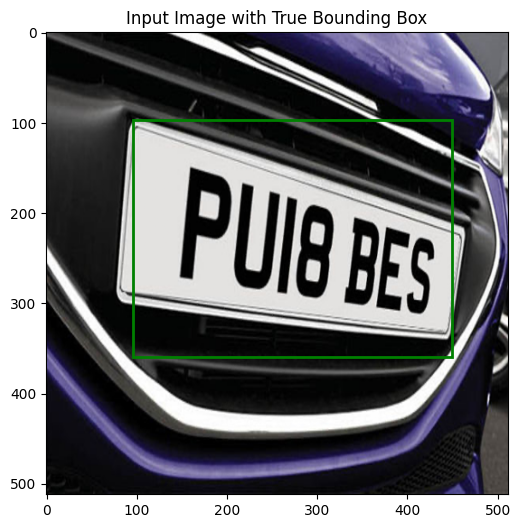

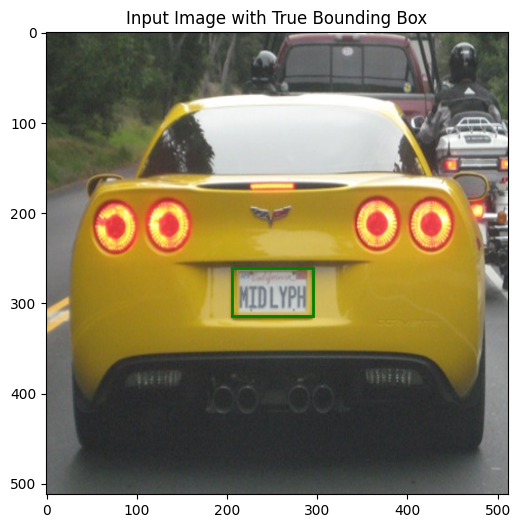

In [29]:
# Visualizing some predictions
for i in range(2, 5):
    plt.figure(figsize=(12, 6))  # Create a new figure for each image
    
    # True bounding box
    plt.plot()
    plt.title("Input Image with True Bounding Box")
    plt.imshow(test_images[i])
    true_xmin, true_ymin, true_xmax, true_ymax = test_labels[i][:]*512
    plt.gca().add_patch(plt.Rectangle((true_xmin, true_ymin), true_xmax - true_xmin, true_ymax - true_ymin, edgecolor='g', facecolor='none', linewidth=2))  # Green box for true bounding box
    
    plt.show()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


In [31]:

model = Sequential()

# Layer 1: Convolutional + MaxPooling
model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(512, 512, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=2))

# Layer 2: Convolutional + MaxPooling
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=2))

# Layer 3: Convolutional
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Layer 4: Convolutional
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Layer 5: Convolutional + MaxPooling
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=2))

# Layer 6: Convolutional + MaxPooling
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=2))

# Flatten 
model.add(Flatten())

# Fully connected layers
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='linear'))  # Output: [xmin, ymin, xmax, ymax]

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 96)      34944     
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 96)     384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 256)      1024      
 hNormalization)                                                 
                                                        

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images, train_labels,
    validation_split=0.1,
    epochs=50,
    batch_size=8    
)

In [18]:
model.save("number_plate_segmentation_val8776.h5")

# 82.20% accuracy

Attempt 2 for smaller and bettter/ same accuracy

In [32]:
from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential()

# Layer 1: Convolutional + MaxPooling
model.add(Conv2D(32, (7, 7), strides=2, activation='relu', input_shape=(512, 512, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=2))

# Layer 2: Convolutional
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())

# Layer 3: Convolutional
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Layer 4: Convolutional
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='linear'))  # Output: [xmin, ymin, xmax, ymax]

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 253, 253, 32)      4736      
                                                                 
 batch_normalization_6 (Batc  (None, 253, 253, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 64)      51264     
                                                                 
 batch_normalization_7 (Batc  (None, 126, 126, 64)     256       
 hNormalization)                                                 
                                                      

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images, train_labels,
    validation_split=0.1,
    epochs=100,
    batch_size=8
)


Epoch 1/100
44/44 [==============================] - 3s 72ms/step - loss: 0.0142 - accuracy: 0.7571 - val_loss: 0.0510 - val_accuracy: 0.6154
Epoch 2/100
44/44 [==============================] - 3s 69ms/step - loss: 0.0121 - accuracy: 0.7600 - val_loss: 0.0377 - val_accuracy: 0.5641
Epoch 3/100
44/44 [==============================] - 3s 70ms/step - loss: 0.0136 - accuracy: 0.7257 - val_loss: 0.0302 - val_accuracy: 0.7436
Epoch 4/100
44/44 [==============================] - 3s 68ms/step - loss: 0.0123 - accuracy: 0.7457 - val_loss: 0.0344 - val_accuracy: 0.6923
Epoch 5/100
44/44 [==============================] - 3s 68ms/step - loss: 0.0142 - accuracy: 0.6829 - val_loss: 0.0772 - val_accuracy: 0.6923
Epoch 6/100
44/44 [==============================] - 3s 69ms/step - loss: 0.0145 - accuracy: 0.7429 - val_loss: 0.0424 - val_accuracy: 0.6923
Epoch 7/100
44/44 [==============================] - 3s 68ms/step - loss: 0.0135 - accuracy: 0.7400 - val_loss: 0.0315 - val_accuracy: 0.6923
Epoch 

In [37]:
model.save("2nd model.h5")